# Outils informatiques pour le Big Data

## Examen du 05 décembre 2018

**Prénom:**

**Nom:**

*Attention vous devez déposer ce fichier sur [cursus](https://cursus.univ-rennes2.fr/course/view.php?id=11467) avant 12h45*

Les données fournies pour cette examen sont les crimes reportés dans une grande ville américaine durant une année.

In [5]:
%env JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_162.jdk/Contents/Home

env: JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_162.jdk/Contents/Home


In [6]:
import findspark
findspark.init()

## Exercice 1

Créez une session de type `SparkContext` nommée `sc` avec deux processeurs 

In [7]:
# Create a local spark cluster with 2 workers
from pyspark import SparkContext

sc = SparkContext('local[2]')

In [8]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

## Exercise 2

Vérifier que votre session fonctionne correctement en testant le programme suivant:

In [9]:
rdd = sc.parallelize(range(8))  # create collection

In [10]:
rdd.collect()

[0, 1, 2, 3, 4, 5, 6, 7]

## Exercice 3

Lisez les données se trouvant dans le fichier `big-data/data/philadelphia-crime-data-2015-ytd.csv` et stocker les dans une variable nommée `base_rdd`

In [11]:
base_rdd = sc.textFile("file:///Users/navaro/PycharmProjects/big-data/data/philadelphia-crime-data-2015-ytd.csv")

**Question**: La variable `base_rdd` contient-elle déjà les données ?

 * [ ] Oui
 * [X] Non

Affichons les 10 premières observations:

In [12]:
base_rdd.take(10)

['SECTOR,DC_DIST,DC_KEY,LOCATION_BLOCK,UCR_GENERAL,OBJECTID,TEXT_GENERAL_CODE,POINT_X,POINT_Y,SHAPE,DISPATCH_DATE,DISPATCH_TIME',
 '1,1,201501000030,1500 BLOCK SHUNK ST,400,129338817,Aggravated Assault No Firearm,-75.17376025,39.91845624,129239946,2015-01-01,02:28:00.0',
 '1,1,201501000060,2800 BLOCK CANTRELL ST,400,129332317,Aggravated Assault Firearm,-75.19323947,39.92688103,129233446,2015-01-01,15:55:00.0',
 '1,1,201501000081,2800 BLOCK CANTRELL ST,300,129330354,Robbery Firearm,-75.19356481,39.92692647,129231483,2015-01-01,23:46:00.0',
 '2,1,201501000155,1800 BLOCK W MOYAMENSING AVE,600,129372455,Theft from Vehicle,-75.17877691,39.9142244,129273584,2015-01-02,10:52:00.0',
 '1,1,201501000173,2000 BLOCK POINT BREEZE AVE,600,129345460,Theft from Vehicle,-75.18862964,39.92739659,129246589,2015-01-02,14:26:00.0',
 '1,1,201501000282,2000 BLOCK OREGON AV,600,129365351,Thefts,-75.18147584,39.91823982,129266480,2015-01-03,12:43:00.0',
 '1,1,201501000284,2000 BLOCK S 22ND ST,600,129352165,The

Filtrons la première ligne pour ne pas tenir compte de la ligne d'entête.

In [13]:
no_header_rdd = base_rdd.filter(lambda line: 'SECTOR' not in line)

In [14]:
no_header_rdd.take(10)

['1,1,201501000030,1500 BLOCK SHUNK ST,400,129338817,Aggravated Assault No Firearm,-75.17376025,39.91845624,129239946,2015-01-01,02:28:00.0',
 '1,1,201501000060,2800 BLOCK CANTRELL ST,400,129332317,Aggravated Assault Firearm,-75.19323947,39.92688103,129233446,2015-01-01,15:55:00.0',
 '1,1,201501000081,2800 BLOCK CANTRELL ST,300,129330354,Robbery Firearm,-75.19356481,39.92692647,129231483,2015-01-01,23:46:00.0',
 '2,1,201501000155,1800 BLOCK W MOYAMENSING AVE,600,129372455,Theft from Vehicle,-75.17877691,39.9142244,129273584,2015-01-02,10:52:00.0',
 '1,1,201501000173,2000 BLOCK POINT BREEZE AVE,600,129345460,Theft from Vehicle,-75.18862964,39.92739659,129246589,2015-01-02,14:26:00.0',
 '1,1,201501000282,2000 BLOCK OREGON AV,600,129365351,Thefts,-75.18147584,39.91823982,129266480,2015-01-03,12:43:00.0',
 '1,1,201501000284,2000 BLOCK S 22ND ST,600,129352165,Thefts,-75.18249755,39.92695112,129253294,2015-01-03,13:08:00.0',
 '1,1,201501000297,S 18TH ST / W PASSYUNK AV,600,129372464,Theft fr

## Description des variables

* `DC_DIST` (integer): District number
* `SECTOR` (integer): Sector or PSA Number
* `DISPATCH_DATE` (date string): Date of Incident 
* `DISPATCH_TIME` (time string): Time of Incident
* `DC_KEY`: (text): Unique ID of each crime
* `UCR_General` (integer): Rounded Crime Code
* `TEXT_GENERAL_CODE` (string): Human-readable Crime Code
* `OBJECTID` (integer): Unique row ID
* `POINT_X` (decimal): Latitude where crime occurred
* `POINT_Y` (decimal): Longitude where crime occurred

### Exercise 4

Transformer cette variable `base_rdd` pour qu'elle ne contienne que des objets Python

* Décomposer chaque ligne à l'aide de la méthode `split`
* Creer une nouvelle RDD nommée `data_rdd` contenant une liste d'instances de la classe `CrimeData` qui est un `nametuple`.

Ne prenez en compte que les variables `date_string`, `time_string`, `offense`, `latitude` et `longitude`.

In [15]:
from collections import namedtuple

CrimeData = namedtuple('CrimeData', ['date_string', 'time_string', 'offense', 'latitude', 'longitude'])

def map_line(line):
    cols = line.split(",")
    return CrimeData(date_string=cols[10], 
                   time_string=cols[11], 
                   offense=cols[6], 
                   latitude=cols[7], 
                   longitude=cols[8])
  
data_rdd = no_header_rdd.map(map_line)
print(data_rdd.take(10))

[CrimeData(date_string='2015-01-01', time_string='02:28:00.0', offense='Aggravated Assault No Firearm', latitude='-75.17376025', longitude='39.91845624'), CrimeData(date_string='2015-01-01', time_string='15:55:00.0', offense='Aggravated Assault Firearm', latitude='-75.19323947', longitude='39.92688103'), CrimeData(date_string='2015-01-01', time_string='23:46:00.0', offense='Robbery Firearm', latitude='-75.19356481', longitude='39.92692647'), CrimeData(date_string='2015-01-02', time_string='10:52:00.0', offense='Theft from Vehicle', latitude='-75.17877691', longitude='39.9142244'), CrimeData(date_string='2015-01-02', time_string='14:26:00.0', offense='Theft from Vehicle', latitude='-75.18862964', longitude='39.92739659'), CrimeData(date_string='2015-01-03', time_string='12:43:00.0', offense='Thefts', latitude='-75.18147584', longitude='39.91823982'), CrimeData(date_string='2015-01-03', time_string='13:08:00.0', offense='Thefts', latitude='-75.18249755', longitude='39.92695112'), CrimeDa

### Exercise 5

Grouper les observations par crime et compter les.

Les observations de la variable `offense` présentent quelques anomalies.
Ecrire le code python permettant de nettoyer les données et stocker le résultat dans une nouvelle rdd nommée `cleaned_data`.

Répondez aux questions suivantes:

 - Combien comptez-vous de meutres durant la période ?
 
 Réponse:
 
 
 - Combien de cambriolages de résidence ? 
 
 Réponse:
 
 
 - Combien de vols à main armée ? 
 
 Réponse:

In [16]:
import re

BAD_OFFENSE_RE = re.compile(r'^\\d+$')

def clean_offense(d):
    d = CrimeData(date_string=d.date_string, 
                    time_string=d.time_string,
                    offense=d.offense.replace('\"', '').strip(),
                    latitude=d.latitude,
                    longitude=d.longitude)
    return d
cleaned_rdd = data_rdd.map(clean_offense).filter(lambda d: BAD_OFFENSE_RE.search(d.offense) is None)

In [17]:
offense_counts = cleaned_rdd.map(lambda item: (item.offense, item)).countByKey()
for offense, counts in offense_counts.items():
    print("{0:30s} {1:d}".format(offense, counts))

Aggravated Assault No Firearm  4634
Aggravated Assault Firearm     1940
Robbery Firearm                2384
Theft from Vehicle             10608
Thefts                         19619
Burglary Residential           5585
Robbery No Firearm             3220
Motor Vehicle Theft            1916
Recovered Stolen Motor Vehicle 5731
Burglary Non-Residential       1251
Homicide - Criminal            223
129338613                      1
129342978                      1
Rape                           1061


### Exercise 6

Ecrire le code Python permettant de tracer l'histogramme du nombre d'homicides en fonction de l'heure de la journée (0:00-24:00).

In [35]:
from datetime import datetime
time_format = "%H:%M:%S"

def parse_time(s):
    return s.split(':')[0]

def parse_date(s):
    return s.split('-')[1]

result1_rdd = cleaned_rdd.filter(lambda item: item.offense.startswith("Homicide"))\
                         .map(lambda d: (parse_time(d.time_string),1))\
                         .countByKey()

result2_rdd = cleaned_rdd.filter(lambda item: item.offense.startswith("Homicide"))\
                         .map(lambda d: (parse_date(d.date_string),1))\
                         .reduceByKey(lambda a, b: a + b)


results1 = sorted(result1_rdd.items())
results2 = sorted(result2_rdd.collect())

<BarContainer object of 24 artists>

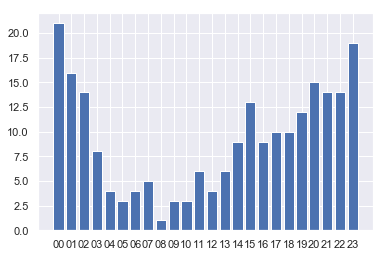

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.bar([ h[0] for h in results1], [ h[1] for h in results1])                   

<BarContainer object of 10 artists>

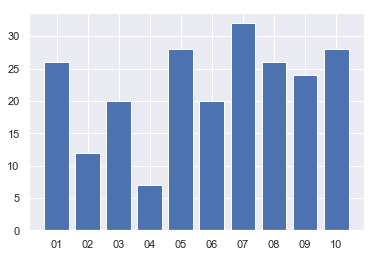

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.bar([ d[0] for d in results2], [ h[1] for h in results2])      